In [1]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import ast
import numpy as np
import os
import ast
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup
import os.path
from datetime import datetime
from collections import Counter
from sklearn.metrics import confusion_matrix
import numpy as np

nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/domantas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/domantas/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /home/domantas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/domantas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
df = pd.read_csv('../Datasets/Translated_tokens_2019-05-05.csv')

In [5]:
import pickle
pickle_in = open("../Frequency_models/word_frequency_2019-05-05.picle","rb")
words_frequency = pickle.load(pickle_in)

In [12]:
top = 2500
from collections import Counter

features = np.zeros(df.shape[0] * top).reshape(df.shape[0], top)
labels = np.zeros(df.shape[0])
counter = 0
for i, row in df.iterrows():
    c = [word for word, word_count in Counter(ast.literal_eval(row['tokens_en'])).most_common(top)]
    labels[counter] = list(set(df['main_category'].values)).index(row['main_category'])
    for word in c:
        if word in words_frequency[row['main_category']]:
            features[counter][words_frequency[row['main_category']].index(word)] = 1
    counter += 1

In [13]:
from sklearn.metrics import accuracy_score
from scipy.sparse import coo_matrix
X_sparse = coo_matrix(features)

from sklearn.utils import shuffle
X, X_sparse, y = shuffle(features, X_sparse, labels, random_state=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
score = lr.score(X_test, y_test)
print('LogisticRegression')
print('Score: ', score)
print('Top: ', top)
print('Dataset length: ', df.shape[0])
print()

from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
clf_predictions = clf.predict(X_test)
score = clf.score(X_test, y_test)
print('SVM')
print('Score: ', score)
print('Top: ', top)
print('Dataset length: ', df.shape[0])

/home/domantas/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/domantas/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression
Score:  0.7613183629119884
Top:  2500
Dataset length:  16731



/home/domantas/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM
Score:  0.6537486417964505
Top:  2500
Dataset length:  16731


In [14]:
cm = confusion_matrix(y_test, lr_predictions)
recall = np.diag(cm) / np.sum(cm, axis = 1)
recall_mean = np.mean(recall)
precision = np.diag(cm) / np.sum(cm, axis = 0)
precision_mean = np.mean(precision)
from sklearn.metrics import classification_report
target_names = list(words_frequency.keys())
results = classification_report(y_test, lr_predictions, target_names=target_names)
print(results)

                          precision    recall  f1-score   support

                Gambling       0.75      0.09      0.16        34
      Autos_and_Vehicles       0.89      0.70      0.78        79
                   Adult       0.75      0.73      0.74       211
                  Health       0.76      0.74      0.75       164
   Business_and_Industry       0.58      0.19      0.29        36
                   Games       0.81      0.77      0.79       177
               Reference       0.77      0.70      0.73       212
                  Sports       0.75      0.55      0.63       120
                 Science       0.76      0.77      0.76       225
      People_and_Society       0.78      0.77      0.77       319
Computer_and_Electronics       0.89      0.80      0.84       256
          Food_and_Drink       0.75      0.67      0.71       147
    Internet_and_Telecom       0.80      0.78      0.79       251
                 Finance       0.79      0.85      0.82       427
      Bea

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
labels = list(words_frequency.keys())
cm = confusion_matrix(y_test, lr_predictions)
fig, ax = plt.subplots()
cax = ax.matshow(cm)
fig.colorbar(cax)
fig.set_size_inches(15, 10)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_yticklabels(labels)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# plt.savefig("../Pictures/lr_confusion_matrix")

<Figure size 1500x1000 with 2 Axes>

In [8]:
cm = confusion_matrix(y_test, clf_predictions)
recall = np.diag(cm) / np.sum(cm, axis = 1)
recall_mean = np.mean(recall)
precision = np.diag(cm) / np.sum(cm, axis = 0)
precision_mean = np.mean(precision)
from sklearn.metrics import classification_report
target_names = list(words_frequency.keys())
results = classification_report(y_test, clf_predictions, target_names=target_names)
print(results)

                          precision    recall  f1-score   support

      People_and_Society       0.86      0.86      0.86        59
               Reference       0.62      0.52      0.56        56
         Home_and_Garden       0.36      0.21      0.27        19
                 Science       0.76      0.72      0.74       143
                   Adult       0.88      0.88      0.88       165
    Internet_and_Telecom       0.86      0.78      0.82        69
                  Travel       0.77      0.75      0.76       134
                Shopping       0.79      0.85      0.82       310
      Beauty_and_Fitness       0.86      0.88      0.87       291
      Autos_and_Vehicles       0.86      0.84      0.85       116
                   Games       0.83      0.72      0.77        93
    Career_and_Education       0.81      0.87      0.84       209
  Recreation_and_Hobbies       0.08      0.11      0.09         9
      Law_and_Government       0.75      0.65      0.70        72
         

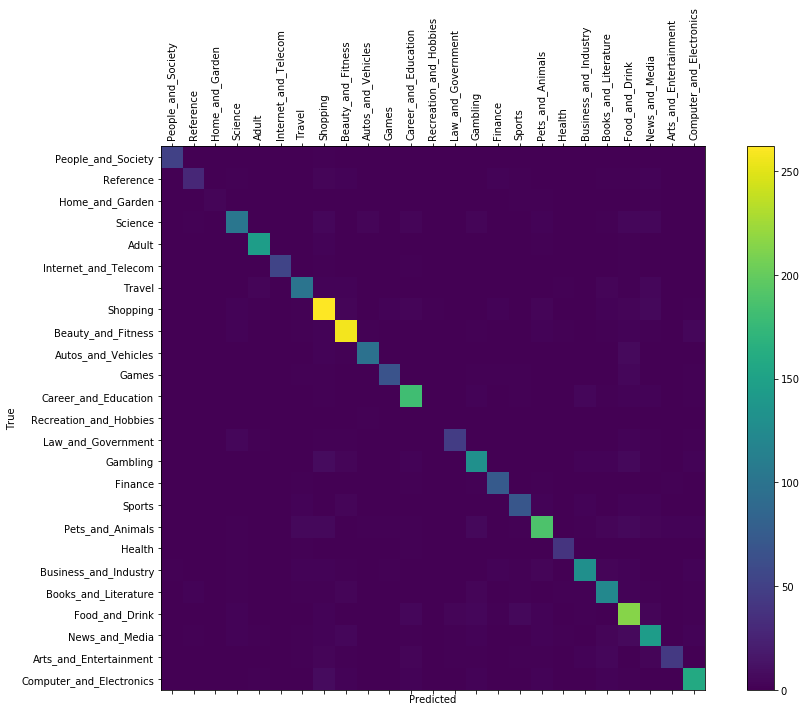

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
labels = list(words_frequency.keys())
cm = confusion_matrix(y_test, clf_predictions)
fig, ax = plt.subplots()
cax = ax.matshow(cm)
fig.colorbar(cax)
fig.set_size_inches(15, 10)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_yticklabels(labels)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# plt.savefig("../Pictures/lsvm_confusion_matrix")

In [ ]:
# # Save models
# from sklearn.externals import joblib
# filename = "../Models/{}/LR_model_{}_latex.joblib".format(month.title(), month)
# if not os.path.isfile(filename):
#     joblib.dump(lr, filename)
    
# filename = "../Models/{}/SVM_model_{}_latex.joblib".format(month.title(), month)
# if not os.path.isfile(filename):
#     joblib.dump(clf, filename)

# import pickle
# words_filename = "../Models/{}/word_frequency_{}_latex.picle".format(month.title(), month)
# if not os.path.isfile(words_filename):
#     pickle_out = open(words_filename,"wb")
#     pickle.dump(words_frequency, pickle_out)
#     pickle_out.close()